In [156]:
import cptac
import cptac.utils as u
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
en = cptac.Endometrial()

In [5]:
phos = en.get_phosphoproteomics()

In [6]:
phos.head()

Name         AAAS                  AACS  AAED1 AAGAB          AAK1         \
Site         S495    S541   Y485   S618    S12  S310   S311    S14    S18   
Patient_ID                                                                  
C3L-00006     NaN     NaN    NaN -0.881 -1.810   NaN    NaN    NaN -0.242   
C3L-00008     NaN     NaN    NaN    NaN  0.084   NaN    NaN -1.110 -0.383   
C3L-00032  -0.202     NaN    NaN    NaN -1.880   NaN    NaN    NaN  0.382   
C3L-00090  -0.002     NaN -0.407    NaN    NaN   NaN    NaN    NaN    NaN   
C3L-00098   0.556 -0.0461    NaN    NaN  0.941   NaN  0.429  0.362  0.697   

Name                ...     ZZZ3                                            \
Site           S20  ...     S397 S411 S420   S424     S426 S468   S89 T415   
Patient_ID          ...                                                      
C3L-00006  -0.2420  ...  0.18400  NaN  NaN    NaN -0.20500  NaN   NaN  NaN   
C3L-00008  -1.0900  ... -0.17100  NaN  NaN -0.393 -0.17100  NaN  0.29  NaN   
C3L-00032  -0.0416  ...      NaN  NaN  NaN    NaN      NaN  NaN   NaN  NaN   
C3L-00090  -0.5550  ...  0.13970  NaN  NaN    NaN -0.55900  NaN   NaN  NaN   
C3L-00098  -0.0529  ... -0.15875  NaN  NaN  0.196  0.06175  NaN   NaN  NaN   

Name                        
Site          T418    Y399  
Patient_ID                  
C3L-00006      NaN     NaN  
C3L-00008   0.1605 -0.0635  
C3L-00032      NaN     NaN  
C3L-00090      NaN  0.2980  
C3L-00098      NaN -0.2900  

[5 rows x 73212 columns]

# CIS

In [8]:
gene = 'PIK3CA'

In [11]:
#Prioritize hotspot mutations
endo = en.get_genotype_all_vars(gene, mutation_hotspot=["H1047R", 'E542K', 'E535K'])
#pull out all the missense mutation and wildtype tumors 
missense = endo.loc[(endo['Mutation'] == "Missense_Mutation") | (endo['Mutation'] == "Wildtype_Tumor")]
#drop everything but the mutation column and join to proteomic data
missense = missense.drop(columns=['Location', 'Mutation_Status'])

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 48 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)


In [203]:
mut_and_phos = missense.join(phos['PIK3CA'])

In [200]:
phos_col = list(phos['PIK3CA'].columns)

In [201]:
result = pd.DataFrame(columns=['Comparison', 'P_Value'])
dfs = []
for column in mut_and_phos:
    if column == "Mutation": pass
    else:
        site = mut_and_phos[column]
        df = mut_and_phos[['Mutation', column]].dropna()
#         df['Site'] = site
        dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
newdf = pd.concat(dfs)
#we're sorting
newdf.sort_values('P_Value')

,Comparison,P_Value
0,T313,0.149861
0,S312,0.494436


# mTOR phosphorylation

In [196]:
# phos['MTOR']

In [35]:
mut_and_phos.index.difference(phos['MTOR'].index)

Index([], dtype='object', name='Patient_ID')

In [17]:
mut_and_phos = missense.join(phos['MTOR'])

In [161]:
# mut_and_phos.head()

In [31]:
phos_col = list(phos['MTOR'].columns)

In [162]:
# mut_and_phos.head()

In [144]:
result = pd.DataFrame(columns=['Comparison', 'P_Value'])
dfs = []
for column in mut_and_phos:
#     import pdb; pdb.set_trace()
    if column == "Mutation": pass
    else:
        site = mut_and_phos[column]
        df = mut_and_phos[['Mutation', column]].dropna()
#         df['Site'] = site
        dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
newdf = pd.concat(dfs)
#we're sorting
newdf.sort_values('P_Value')

#sites that have problems: S1851, S2454, T1829, T1837

Incorrectly Formatted Dataframe! Label column must have exactly 2 unique values.
Incorrectly Formatted Dataframe! Label column must have exactly 2 unique values.


/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Comparison,P_Value
0,S2069,0.056639
0,T1834,0.108696
0,S1821,0.128346
0,S1851,0.284785
0,T1826,0.596699
0,S2481,0.611178
0,S1261,0.614098
0,S1849,0.701403
0,Y2449,0.725583
0,T2471,0.772390


# Plot

In [145]:
def format_pval_annotation(pval_symbol, x1, x2, line_start = .05, line_height=.05):
    # for manual adjustment to pval annotations
    
    y, h = line_start, line_height
    plt.plot([x1, x1, x2, x2], #draw horizontal line
             [y, y+h, y+h, y], #vertical line
             lw=1.5, color= '.3')
    plt.text((x1+x2)*.5, # half between x coord
             y+h, pval_symbol, horizontalalignment='center', verticalalignment='bottom', color = "black")


In [149]:
df = mut_and_phos[['Mutation', 'S2069']].dropna()

In [150]:
site = "S2069"

In [148]:
df

,Mutation,S2069
Patient_ID,,
C3L-00145,Wildtype_Tumor,0.00635
C3L-00770,Missense_Mutation,0.33100
C3L-01275,Wildtype_Tumor,0.00000
C3N-00200,Missense_Mutation,0.34800
C3N-00386,Wildtype_Tumor,-0.34400


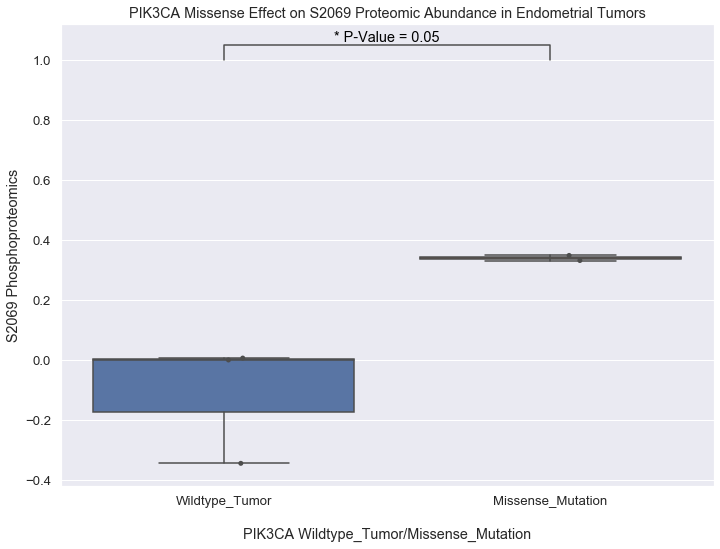

In [159]:
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=site, 
                         order = ['Wildtype_Tumor', 'Missense_Mutation'], data = df, showfliers = False)    
boxplot.set_title('PIK3CA Missense Effect on '+site+' Proteomic Abundance in Endometrial Tumors')
boxplot = sns.stripplot(x='Mutation', y=site, data = df, jitter = True, 
                           color = ".3", order = ['Wildtype_Tumor', 'Missense_Mutation'], dodge = True)
boxplot.set(xlabel = "\nPIK3CA Wildtype_Tumor/Missense_Mutation", ylabel = site+' Phosphoproteomics')

format_pval_annotation('* P-Value = 0.05', 0, 1, 1)

plt.show()
plt.clf()
plt.close()

# AKT

In [181]:
gene1_filter = phos.columns.get_level_values("Name").str.startswith("AKT") # Select all columns where the gene starts with "AA". This will grab every column where the key "Name" starts with AA
gene1_data = phos.loc[:, gene1_filter]
gene1_data.head()

Name        AKT1                                     AKT1S1                 \
Site        S122     S124    S126     S129     T450    S108    S112   S203   
Patient_ID                                                                   
C3L-00006    NaN -0.04605  0.1481 -0.04605      NaN  0.0879  0.0879 -0.858   
C3L-00008  -0.25 -0.26300 -0.1210 -0.18550 -0.00876  0.4525  0.4070  3.440   
C3L-00032    NaN  0.21400  0.0505  0.03195      NaN     NaN     NaN    NaN   
C3L-00090    NaN -0.00300 -0.0282  0.04540      NaN  0.7890  0.6350  1.240   
C3L-00098    NaN -0.18965 -0.0393 -0.07715 -0.30100  0.0525  0.2160 -1.840   

Name                         ... AKT2                         AKT3            \
Site          S222     S223  ... S474   T133   T449     T451   S34 T122 T445   
Patient_ID                   ...                                               
C3L-00006   0.5620  0.26000  ...  NaN    NaN    NaN -0.35000   NaN  NaN  NaN   
C3L-00008  -0.1695 -0.16950  ...  NaN  0.777    NaN  0.19400 -1.16  NaN  NaN   
C3L-00032   0.6810  0.12800  ...  NaN    NaN    NaN  0.17400   NaN  NaN  NaN   
C3L-00090   0.2850  0.36500  ...  NaN    NaN    NaN  0.01320   NaN  NaN  NaN   
C3L-00098   0.2670 -0.01684  ...  NaN    NaN  0.167  0.81615   NaN  NaN  NaN   

Name                 AKTIP         
Site           T447    S30    T34  
Patient_ID                         
C3L-00006  -0.49900  0.662    NaN  
C3L-00008  -0.73100    NaN    NaN  
C3L-00032   0.00275    NaN  0.593  
C3L-00090  -1.56000  0.368 -0.366  
C3L-00098  -0.78600    NaN    NaN  

[5 rows x 33 columns]

In [183]:
akt1 = gene1_data['AKT1']

In [184]:
mut_and_phos = missense.join(akt1)
mut_and_phos

,Mutation,S122,S124,S126,S129,T450
Patient_ID,,,,,,
C3L-00006,Missense_Mutation,NaN,-0.04605,0.14810,-0.04605,NaN
C3L-00008,Wildtype_Tumor,-0.2500,-0.26300,-0.12100,-0.18550,-0.00876
C3L-00032,Missense_Mutation,NaN,0.21400,0.05050,0.03195,NaN
C3L-00090,Wildtype_Tumor,NaN,-0.00300,-0.02820,0.04540,NaN
C3L-00136,Wildtype_Tumor,0.2170,0.16500,0.22800,0.06200,-0.33000
...,...,...,...,...,...,...
C3N-01510,Missense_Mutation,NaN,-0.13120,-0.65600,-0.61400,0.04280
C3N-01520,Missense_Mutation,NaN,-0.35400,-0.30800,-0.17250,NaN
C3N-01537,Wildtype_Tumor,0.0241,0.02410,-0.01185,-0.04780,NaN


In [188]:
phos_col = list(gene1_data['AKT1'].columns)

In [189]:
result = pd.DataFrame(columns=['Comparison', 'P_Value'])
dfs = []
for column in mut_and_phos:
#     import pdb; pdb.set_trace()
    if column == "Mutation": pass
    else:
        site = mut_and_phos[column]
        df = mut_and_phos[['Mutation', column]].dropna()
#         df['Site'] = site
        dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
newdf = pd.concat(dfs)
#we're sorting
newdf.sort_values('P_Value')

,Comparison,P_Value
0,S124,0.306117
0,S129,0.422030
0,S122,0.644028
0,S126,0.713245
0,T450,0.903407


In [193]:
akt1s1 = gene1_data['AKT1S1']
mut_and_phos = missense.join(akt1s1)
phos_col = list(gene1_data['AKT1S1'].columns)
result = pd.DataFrame(columns=['Comparison', 'P_Value'])

dfs = []
for column in mut_and_phos:
#     import pdb; pdb.set_trace()
    if column == "Mutation": pass
    else:
        site = mut_and_phos[column]
        df = mut_and_phos[['Mutation', column]].dropna()
#         df['Site'] = site
        dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
newdf = pd.concat(dfs)
#we're sorting
newdf.sort_values('P_Value')

,Comparison,P_Value
0,T117,0.169107
0,S241,0.241577
0,T110,0.314467
0,T93,0.436829
0,S231,0.454566
0,S222,0.470232
0,S223,0.556630
0,T266,0.631440
0,S108,0.646104
0,S267,0.716719


In [194]:
AKT2 = gene1_data['AKT2']
mut_and_phos = missense.join(AKT2)
phos_col = list(gene1_data['AKT2'].columns)
result = pd.DataFrame(columns=['Comparison', 'P_Value'])

dfs = []
for column in mut_and_phos:
#     import pdb; pdb.set_trace()
    if column == "Mutation": pass
    else:
        site = mut_and_phos[column]
        df = mut_and_phos[['Mutation', column]].dropna()
#         df['Site'] = site
        dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
newdf = pd.concat(dfs)
#we're sorting
newdf.sort_values('P_Value')

/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Comparison,P_Value
0,T451,0.444021
0,S302,0.677563
0,S126,0.677609
0,S34,0.799113
0,S128,0.984912
0,S474,NaN
0,T133,NaN
0,T449,NaN


In [195]:
AKT3 = gene1_data['AKT3']
mut_and_phos = missense.join(AKT3)
phos_col = list(gene1_data['AKT3'].columns)
result = pd.DataFrame(columns=['Comparison', 'P_Value'])

dfs = []
for column in mut_and_phos:
#     import pdb; pdb.set_trace()
    if column == "Mutation": pass
    else:
        site = mut_and_phos[column]
        df = mut_and_phos[['Mutation', column]].dropna()
#         df['Site'] = site
        dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
newdf = pd.concat(dfs)
#we're sorting
newdf.sort_values('P_Value')

Incorrectly Formatted Dataframe! Label column must have exactly 2 unique values.


/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Comparison,P_Value
0,S34,0.424415
0,T447,0.952040
0,T445,NaN
